# Sheet
Vergelijk de verschillen in de NBS per issue en per waarde van p

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import ipywidgets as widget
from IPython.core.display import display, HTML
%matplotlib inline

pd.set_option('display.max_rows', 750)
pd.set_option('display.max_columns', 500)
data_set_id = 6

In [21]:
conn = sqlite3.connect('/home/jelmert/PycharmProjects/decide-exchange-model/data/output/decide-data_1.db')

In [22]:
df = pd.read_sql("""
SELECT
        a.name AS actor,
        i.name as issue,
        AVG(ai.position) as postion,        
        i2.pointer                                AS iteration,
        m.p,
        m.id  
      FROM actorissue ai
        LEFT JOIN issue i ON ai.issue_id = i.id
        LEFT JOIN actor a ON ai.actor_id = a.id
        LEFT JOIN iteration i2 ON ai.iteration_id = i2.id
        LEFT JOIN repetition r ON i2.repetition_id = r.id
        LEFT JOIN modelrun m ON r.model_run_id = m.id
        LEFT JOIN dataset d ON a.data_set_id = d.id
      WHERE  ai.type = 'before' AND d.id = ?
     GROUP BY m.id, i2.pointer, a.id, i.id;
""", 
                 conn, 
                 params=(data_set_id,),
                 index_col=[ 'issue','actor','p'],                  
                 columns=['postion']
                )

table = pd.pivot_table(df, index=['issue','actor', 'iteration'], columns=['p'],values=['postion'])


# Posities 
Verloop van de positie over de verschillende onderhandelingsrondes van de actor per issue 

In [23]:
table

postion            
p                                            0.0         0.8
issue         actor        iteration                        
adapt_finance AILAC2       0          100.000000  100.000000
                           1          100.000000   91.721128
                           2           99.488934   91.721128
                           3           96.172169   88.488307
                           4           96.099094   87.073341
                           5           94.120767   85.983586
                           6           94.016475   84.179748
                           7           93.890829   84.113822
                           8           93.704827   81.835062
                           9           93.662545   80.427747
              ALBA         0          100.000000  100.000000
                           1           76.000000   76.000000
                           2           61.271859   61.628823
                           3           70.443957   54.394162
                           4           60.737408   61.050061
                           5           68.465401   66.394699
                           6           59.286853   58.145102
                           7           67.621962   64.393417
                           8           61.703422   58.668848
                           9           59.718496   64.228739
              AOSIS        0          100.000000  100.000000
                           1           91.600000   91.609512
                           2           85.566933   82.984181
                           3           82.172579   81.854279
                           4           76.989556   79.677917
                           5           75.897727   77.008925
                           6           71.711638   74.271311
                           7           70.791160   72.783143
                           8           68.976852   71.118467
                           9           67.303245   70.215577
              African_grp  0          100.000000  100.000000
                           1           87.400000   90.442958
                           2           77.068000   79.563226
                           3           68.595760   71.731254
                           4           61.648523   64.284223
                           5           67.849626   60.302637
                           6           63.916676   62.685074
                           7           61.896701   66.554115
                           8           61.628941   61.871763
                           9           59.170566   64.725687
              Arab_statess 0           50.000000   50.000000
                           1           59.000000   59.000000
                           2           66.380000   65.165445
                           3           59.934398   59.240622
                           4           66.457197   64.505205
                           5           60.963993   63.609526
                           6           66.932212   62.657402
                           7           60.395210   66.531424
                           8           66.424422   61.853156
                           9           62.604334   65.449899
              Brazil       0           50.000000   50.000000
                           1           65.000000   65.000000
                           2           49.889824   50.336029
                           3           60.652020   60.248558
                           4           70.784349   68.720483
                           5           58.549044   57.274591
                           6           66.182612   63.850848
                           7           55.512489   61.731236
                           8           61.418961   60.691049
                           9           65.913333   65.755301
              China        0           50.000000   50.000000
                           1           64.000000   64.000000
                           2           50.177169   50.593627
               

IndexError: index 3 is out of bounds for axis 0 with size 3

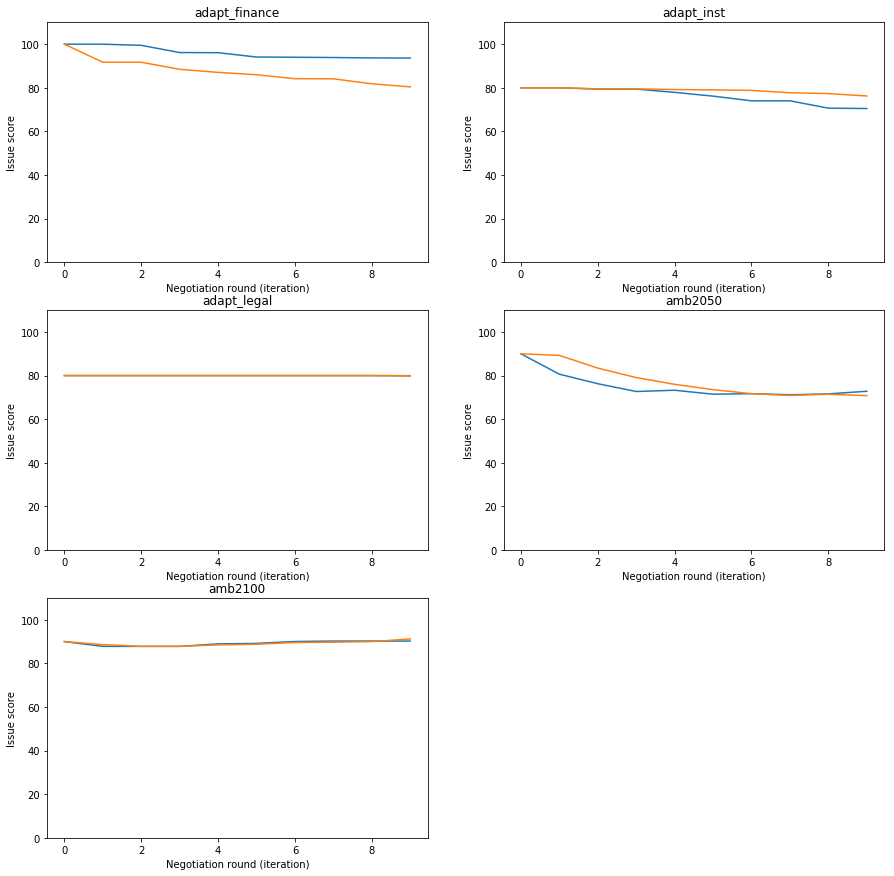

In [24]:
cursor = conn.execute('SELECT `name`, `id`, lower, upper FROM issue WHERE data_set_id = ? ORDER BY `name`', [data_set_id])
issues = cursor.fetchall()

cursor = conn.execute('SELECT `name`, `id` FROM actor WHERE data_set_id = ? ORDER BY `name`', [data_set_id])
actors = cursor.fetchall()

for actor, actor_id in actors:
    
    fig, axes = plt.subplots(3, 2, figsize=(15,15))  # a figure with a 2x2 grid of Axes    
    i = 0
    fig.delaxes(axes[2,1])
    display(HTML('<hr><h1><center>{}</center></h1>'.format(actor)))
    for issue in issues:
        
        row = int(i / 2)
        col = i % 2
        
        subset = table.query('actor == ["{}"] and issue == ["{}"]'.format(actor, issue[0]))
        subchart = axes[row, col]
        subchart.plot(subset.values)
        subchart.set_ylim(0, 110)        
        subchart.set_title(issue[0])
        subchart.set_ylabel('Issue score')
        subchart.set_xlabel('Negotiation round (iteration)')
        
        i+=1
        
    
    plt.tight_layout()
    plt.show()
    